In [3]:
# Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
# Ler os dados
Base_Dados = pd.read_csv('datasets/unicorns till sep 2022.csv')

Base_Dados['Id'] = Base_Dados.index
Coluna_Id = Base_Dados.pop('Id')
Base_Dados.insert(0,'Id', Coluna_Id)

# Verificar Dimensão
Base_Dados.shape

(1186, 8)

In [5]:
# Primeiros registros
Base_Dados.head()

,Id,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [6]:
# Colunas
Base_Dados.columns

Index(['Id', 'Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [7]:
# Renomear
Base_Dados.rename( columns={
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Investors' : 'Investidores',
}, inplace=True)

In [8]:
# Verificar Tipo de informação
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              1186 non-null   int64 
 1   Empresa         1186 non-null   object
 2   Valor ($)       1186 non-null   object
 3   Data de Adesão  1186 non-null   object
 4   Pais            1186 non-null   object
 5   City            1186 non-null   object
 6   Setor           1186 non-null   object
 7   Investidores    1168 non-null   object
dtypes: int64(1), object(7)
memory usage: 74.3+ KB


In [9]:
Base_Dados.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
City               0
Setor              0
Investidores      18
dtype: int64

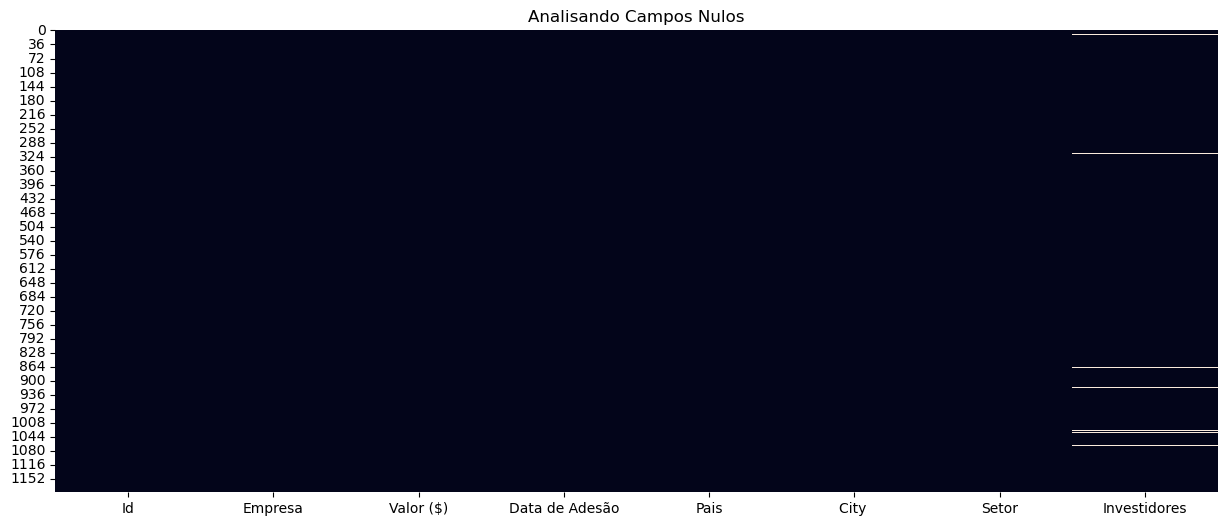

In [10]:
# Grafica
plt.figure( figsize=(15, 6) )
plt.title('Analisando Campos Nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False );

In [11]:
# Campos Unicos
Base_Dados.nunique()

Id                1186
Empresa           1183
Valor ($)          222
Data de Adesão     695
Pais                48
City               286
Setor               34
Investidores      1152
dtype: int64

In [12]:
Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [13]:
# Valores Unicos - Rank
Base_Dados['Setor'].value_counts()

Setor
Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail               

In [14]:
# Valores Unicos - Rank
Base_Dados['Setor'].value_counts( normalize=True )

Setor
Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                        

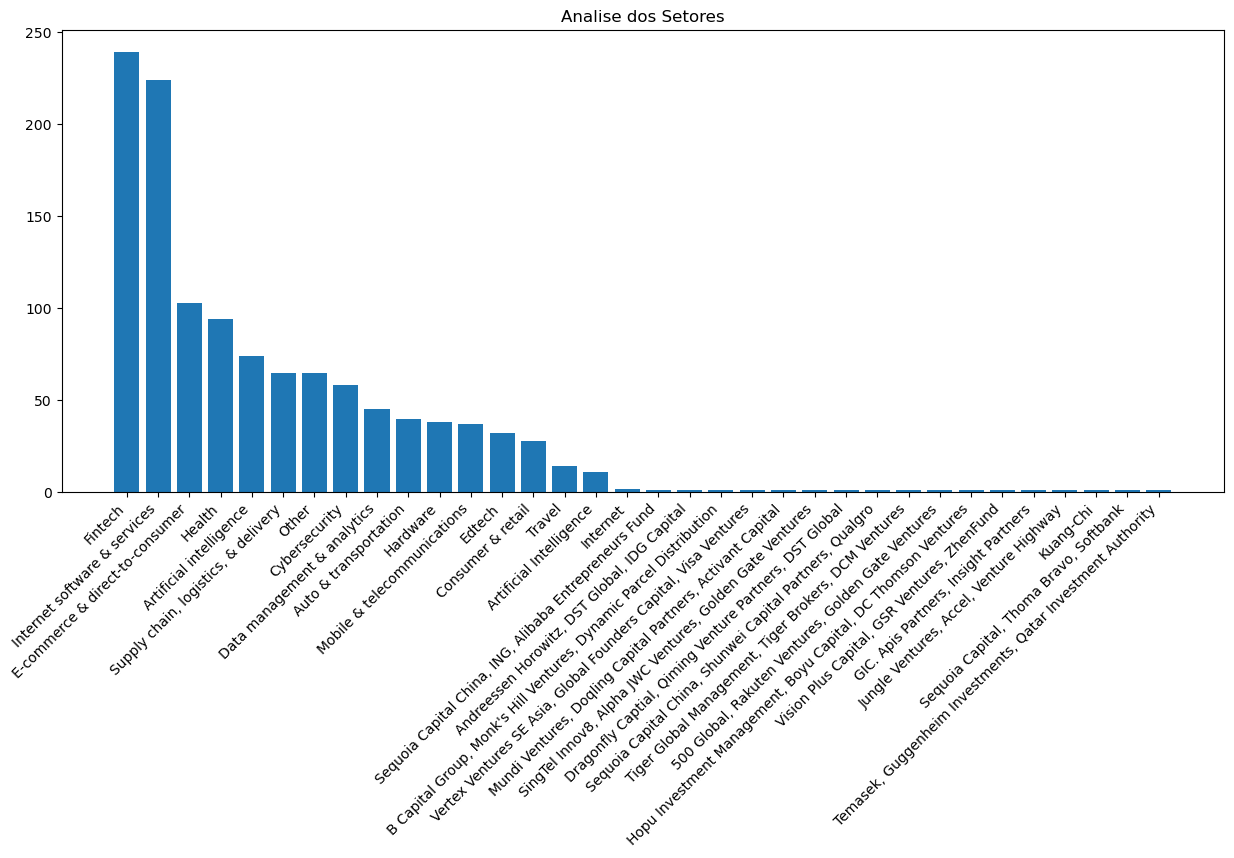

In [15]:
plt.figure( figsize=(15, 6) )
plt.title('Analise dos Setores')
plt.bar( Base_Dados['Setor'].value_counts().index, Base_Dados['Setor'].value_counts() )
plt.xticks( rotation=45, ha='right');

In [16]:
Base_Dados['Pais']

0               China
1       United States
2               China
3       United States
4           Australia
            ...      
1181            India
1182    United States
1183    United States
1184    United States
1185    United States
Name: Pais, Length: 1186, dtype: object

In [17]:
Base_Dados['Pais'].value_counts()

Pais
United States           636
China                   174
India                    70
United Kingdom           46
Germany                  29
France                   24
Israel                   22
Canada                   19
Brazil                   17
South Korea              17
Singapore                13
Sweden                    8
Mexico                    8
Australia                 8
Indonesia                 7
Netherlands               7
Hong Kong                 7
Ireland                   6
Japan                     6
Switzerland               6
Norway                    5
Finland                   4
Spain                     4
Turkey                    3
Colombia                  3
Belgium                   3
United Arab Emirates      3
Austria                   2
Lithuania                 2
Vietnam                   2
Thailand                  2
Estonia                   2
Chile                     2
Denmark                   2
Philippines               2
Croatia        

In [18]:
Analise = round(Base_Dados['Pais'].value_counts( normalize=True ) * 100, 1 )

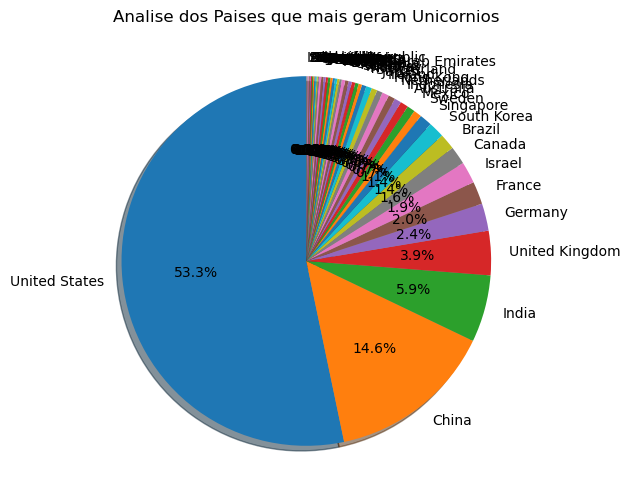

In [19]:
#Plot geral dos paises
plt.figure( figsize=(15, 6) )
plt.title('Analise dos Paises que mais geram Unicornios')
plt.pie(
    Analise,
    labels= Analise.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

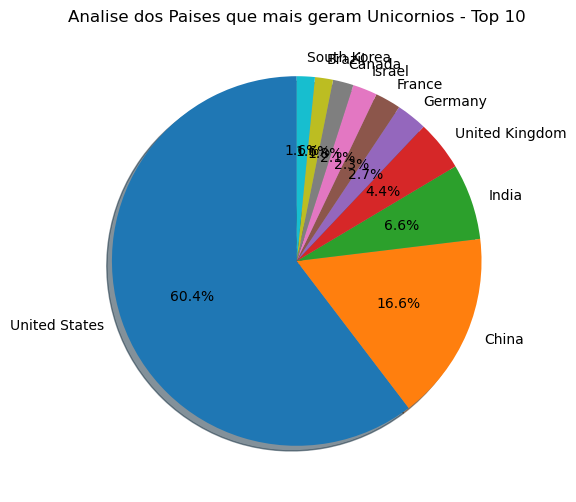

In [20]:
#Plot geral dos paises
plt.figure( figsize=(15, 6) )
plt.title('Analise dos Paises que mais geram Unicornios - Top 10')
plt.pie(
    Analise.head(10),
    labels= Analise.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [21]:
# Conversão para Data
Base_Dados['Data de Adesão'] = pd.to_datetime( Base_Dados['Data de Adesão'] )

Base_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [22]:
# Extrair o Ano e Mes
Base_Dados['Mes'] = pd.DatetimeIndex( Base_Dados['Data de Adesão'] ).month
Base_Dados['Ano'] = pd.DatetimeIndex( Base_Dados['Data de Adesão'] ).year

Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [23]:
# Tabela Analitica
Analise_Agrupada = Base_Dados.groupby( by=['Pais', 'Ano', 'Mes', 'Empresa']).count()['Id'].reset_index()

Analise_Agrupada

,Pais,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
1181,United States,2022,8,Flow,1
1182,United States,2022,8,Incredible Health,1
1183,United States,2022,8,Orna Therapeutics,1
1184,Vietnam,2021,10,Sky Mavis,1


In [24]:
Analise_Agrupada.loc[
    Analise_Agrupada['Pais'] == 'Brazil'
]

,Pais,Ano,Mes,Empresa,Id
16,Brazil,2018,7,Movile,1
17,Brazil,2018,11,iFood,1
18,Brazil,2019,6,Loggi,1
19,Brazil,2019,9,QuintoAndar,1
20,Brazil,2019,10,EBANX,1
21,Brazil,2019,12,Wildlife Studios,1
22,Brazil,2020,1,Loft,1
23,Brazil,2020,12,C6 Bank,1
24,Brazil,2020,12,Creditas,1
25,Brazil,2021,1,MadeiraMadeira,1


In [25]:
Analise_Agrupada.loc[
    Analise_Agrupada['Pais'] == 'United States'
]

,Pais,Ano,Mes,Empresa,Id
548,United States,2011,4,Vice Media,1
549,United States,2012,6,Fanatics,1
550,United States,2012,12,Avant,1
551,United States,2012,12,SpaceX,1
552,United States,2013,2,Mu Sigma,1
...,...,...,...,...,...
1179,United States,2022,7,Unstoppable Domains,1
1180,United States,2022,7,VulcanForms,1
1181,United States,2022,8,Flow,1
1182,United States,2022,8,Incredible Health,1


In [26]:
# Transformando a coluna valor
Base_Dados['Valor ($)'] = pd.to_numeric( Base_Dados['Valor ($)'].apply( lambda Linha: Linha.replace('$', '') ) )

Base_Dados.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [36]:
# Tabela Analitica
Analise_Pais = Base_Dados.groupby(by=['Pais', 'Setor'])['Valor ($)'].sum().reset_index()

Analise_Pais


,Pais,Setor,Valor ($)
0,Argentina,Fintech,2.45
1,Australia,E-commerce & direct-to-consumer,1.00
2,Australia,Fintech,8.00
3,Australia,Internet software & services,45.40
4,Austria,Edtech,3.50
...,...,...,...
216,United States,Other,228.26
217,United States,"Supply chain, logistics, & delivery",99.62
218,United States,Travel,7.25
219,Vietnam,Fintech,2.27


In [39]:
Analise_Pais = Base_Dados.groupby(by=['Pais'])['Valor ($)'].sum().reset_index()

Analise_Pais.head()


,Pais,Valor ($)
0,Argentina,2.45
1,Australia,54.40
2,Austria,7.61
3,Bahamas,32.00
4,Belgium,8.95


In [44]:
Analise_Valor = Analise_Pais.sort_values('Valor ($)', ascending=False)

Analise_Valor.head()

,Pais,Valor ($)
46,United States,2069.89
9,China,678.59
45,United Kingdom,205.45
20,India,202.92
18,Germany,80.88


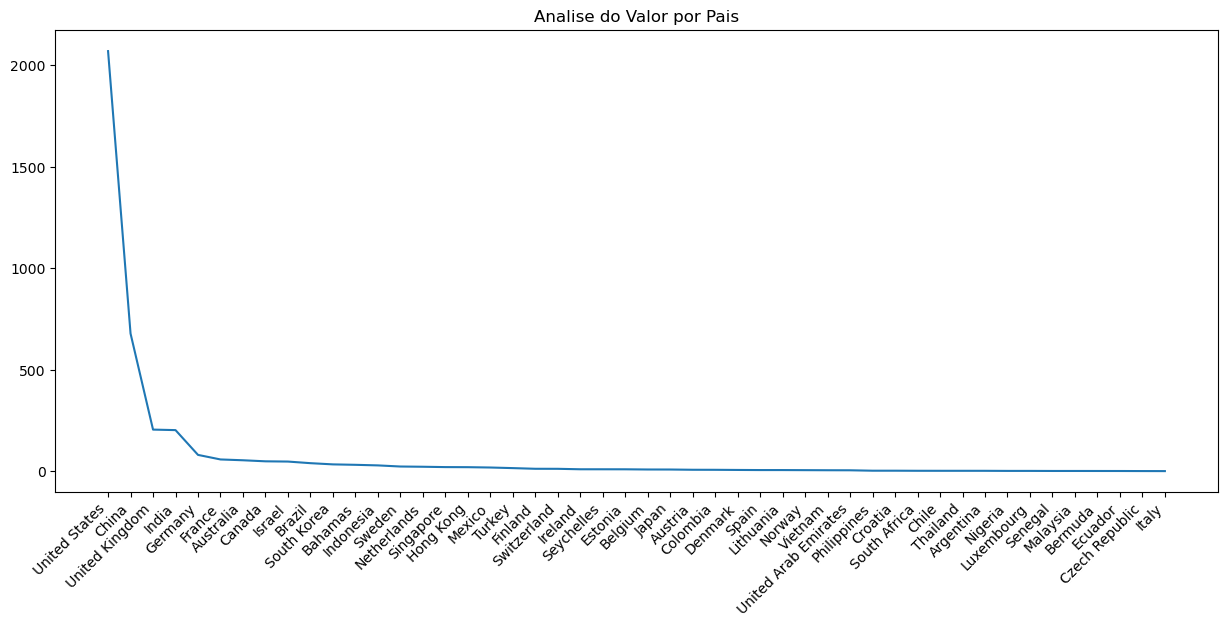

In [49]:
plt.figure( figsize=(15, 6) )
plt.plot(Analise_Valor['Pais'], Analise_Valor['Valor ($)'] )
plt.title('Analise do Valor por Pais')
plt.xticks( rotation=45, ha='right');